# Plotting time series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


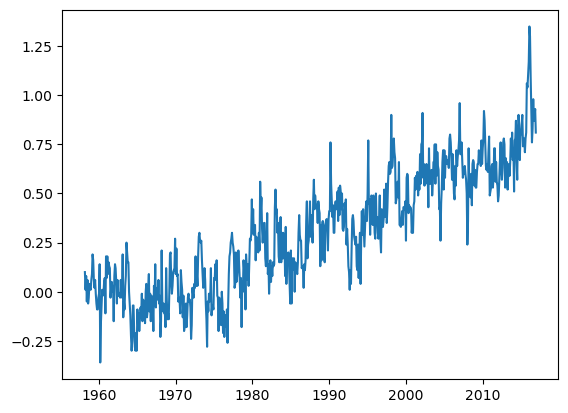

In [2]:
fig,ax = plt.subplots()
climate_change = pd.read_csv('climate_change.csv' , parse_dates=["date"] , index_col="date") # making date as index
ax.plot(climate_change.index , climate_change["relative_temp"])
plt.show()

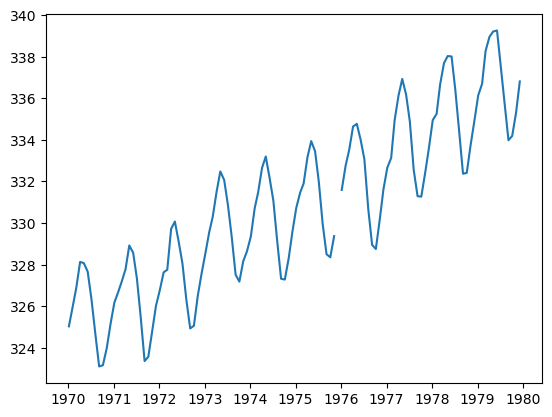

In [3]:
fig,ax = plt.subplots()
# Creating variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01":"1979-12-31"]
ax.plot(seventies.index, seventies["co2"])
plt.show()

# plotting time series with different variables

3. Plotting two time-series together

As before, we can create a Figure and Axes and add the data from one variable to the plot. And we can add the data from the other variable to the plot. We also add axis labels and show the plot. But this doesn't look right. The line for carbon dioxide has shifted upwards, and the line for relative temperatures looks completely flat. The problem is that the scales for these two measurements are different.

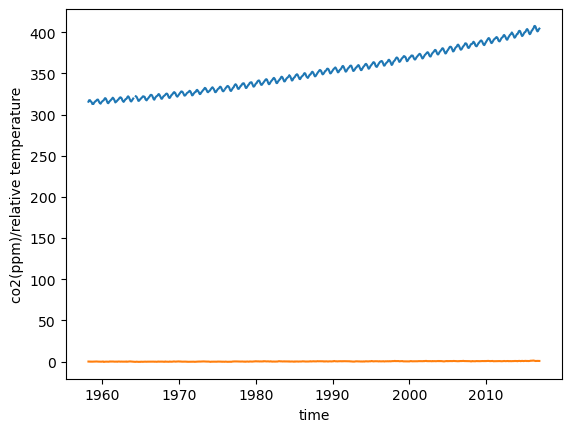

In [4]:
fig, ax = plt.subplots()
ax.plot(climate_change.index , climate_change["co2"])
ax.plot(climate_change.index , climate_change["relative_temp"])
ax.set_xlabel("time")
ax.set_ylabel("co2(ppm)/relative temperature")
plt.show()


4. Using twin axes

You've already seen how you could plot these time-series in separate sub-plots. Here, we're going to plot them in the same sub-plot, using two different y-axis scales. Again, we start by adding the first variable to our Axes. Then, we use the twinx method to create a twin of this Axes. This means that the two Axes share the same x-axis, but the y-axes are separate. We add the other variable to this second Axes object and show the figure. There is one y-axis scale on the left, for the carbon dioxide variable, and another y-axis scale to the right for the temperature variable. Now you can see the fluctuations in temperature more clearly. But this is still not quite right. The two lines have the same color. Let's take care of that.

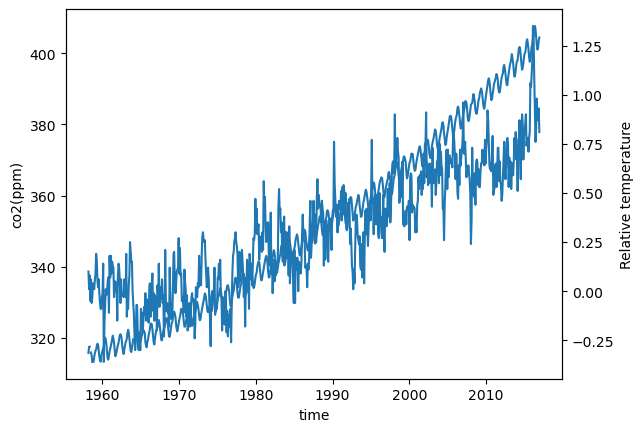

In [5]:
fig,ax = plt.subplots()
ax.plot(climate_change.index , climate_change["co2"])
ax.set_xlabel("time")
ax.set_ylabel("co2(ppm)")
ax2 = ax.twinx()  #sharing common x-axis
ax2.plot(climate_change.index, climate_change["relative_temp"])
ax2.set_ylabel("Relative temperature")
plt.show()

5. Separating variables and graphs by color

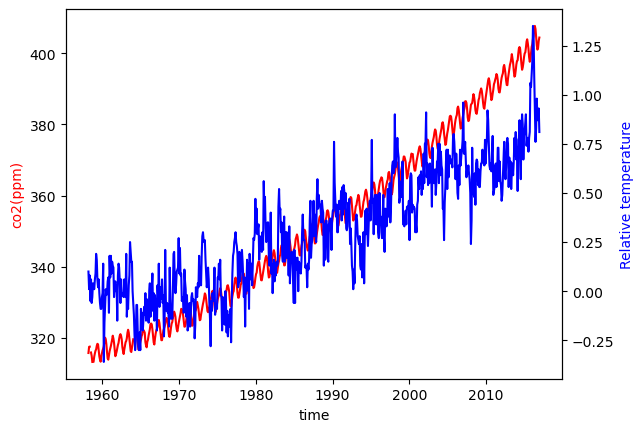

In [6]:
fig,ax = plt.subplots()
ax.plot(climate_change.index , climate_change["co2"] , color = "red")
ax.set_xlabel("time")
ax.set_ylabel("co2(ppm)", color = "red")
ax2 = ax.twinx()  #sharing common x-axis
ax2.plot(climate_change.index, climate_change["relative_temp"] , color = "blue")
ax2.set_ylabel("Relative temperature" , color = "blue")
plt.show()

6. Coloring the ticks

We can make encoding by color even more distinct by setting not only the color of the y-axis labels but also the y-axis ticks and the y-axis tick labels. This is done by adding a call to the tick-underscore-params method. This method takes either y or x as its first argument, pointing to the fact that we are modifying the parameters of the y-axis ticks and tick labels. To change their color, we use the colors key-word argument, setting it to blue. Similarly, we call the tick-underscore-params method from the twin Axes object, setting the colors for these ticks to red.

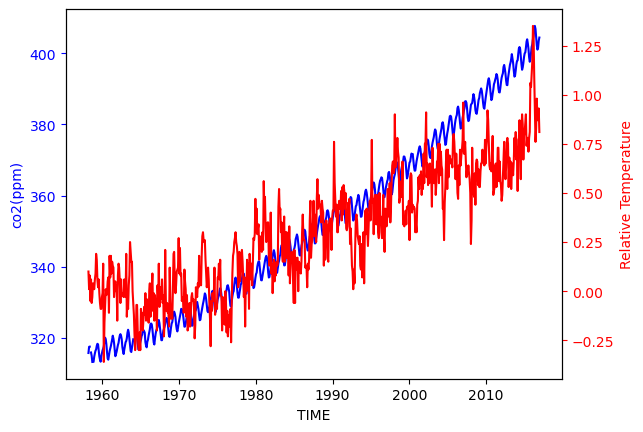

In [7]:
fig , ax = plt.subplots()
ax.plot(climate_change.index , climate_change["co2"],color = "blue")
ax.set_xlabel("TIME")
ax.set_ylabel("co2(ppm)", color = "blue")
ax.tick_params('y',colors = "blue")
ax2 = ax.twinx()
ax2.plot(climate_change.index , climate_change["relative_temp"],color = "red")
ax2.set_ylabel("Relative Temperature" , color = "red")
ax2.tick_params('y',colors = "red")
plt.show()


Plotting the above graph using function to reduce repition of code

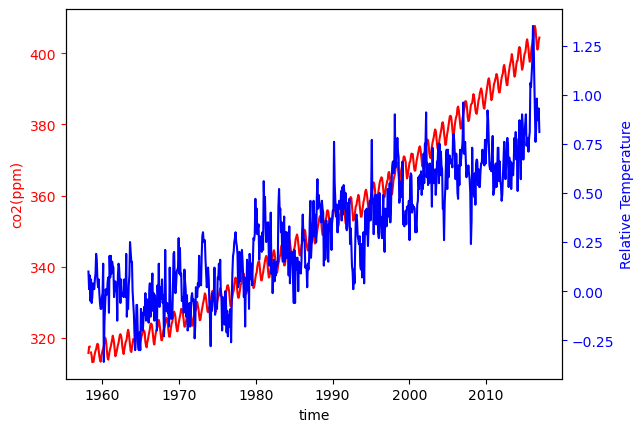

In [8]:
def plot_graph(axes,x,y,xlabel,ylabel,color):
    axes.plot(x,y,color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel,color = color)
    axes.tick_params('y',colors = color)

fig , ax = plt.subplots()
plot_graph(ax,climate_change.index,climate_change["co2"],"time","co2(ppm)","red")
ax2 = ax.twinx()
plot_graph(ax2,climate_change.index,climate_change["relative_temp"],"time","Relative Temperature","blue")

##### annotating time series data

for example, consider the data that we saw in previous code. This data shows the levels of measured carbon dioxide in the atmosphere over a period of more than 50 years in red and the relative temperature over the same period of time in blue. That's a lot of data, and, when presenting it, you might want to focus attention on a particular aspect of this data.

For example, let's say that we noticed that the first date in which the relative temperature exceeded 1 degree Celsius was October 6th, 2015. We'd like to point this out in the plot.

Here again is the code that generates the plot, using the function that we implemented previously. Next, we call a method of the Axes object called annotate. At the very least, this function takes the annotation text as input, in this case, the string ">1 degree", and the xy coordinate that we would like to annotate. Here, the value to annotate has the x position of the TimeStamp of that date. We use the pandas time-stamp object to define that. The y position of the data is 1, which is the 1 degree Celsius value at that date. But this doesn't look great. The text appears on top of the axis tick labels. Maybe we can move it somewhere else?

Text(2015-10-06 00:00:00, 1, 'greater than 1 dgree')

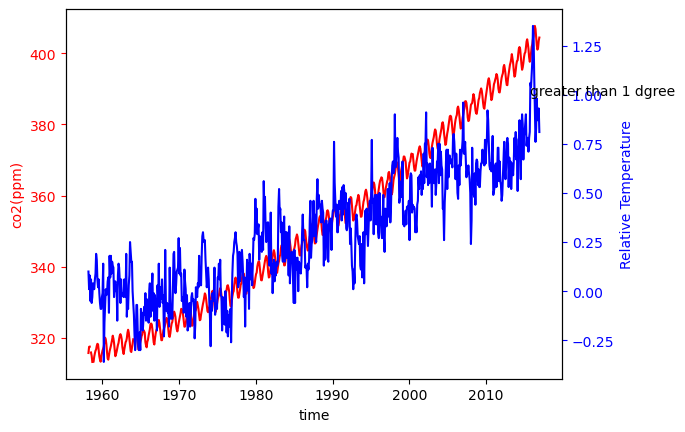

In [9]:
def plot_graph(axes,x,y,xlabel,ylabel,color):
    axes.plot(x,y,color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel,color = color)
    axes.tick_params('y',colors = color)

fig , ax = plt.subplots()
plot_graph(ax,climate_change.index,climate_change["co2"],"time","co2(ppm)","red")
ax2 = ax.twinx()
plot_graph(ax2,climate_change.index,climate_change["relative_temp"],"time","Relative Temperature","blue")
ax2.annotate("greater than 1 dgree" ,xy = (pd.Timestamp("2015-10-06"),1))

#####  Positioning the text

The annotate method takes an optional xy text argument that selects the xy position of the text. After some experimentation, we've found that an x value of October 6th, 2008 and a y value of negative 0-point-2 degrees is a good place to put the text. The problem now is that there is no way to see which data point is the one that is being annotated. Let's add an arrow that connects the text to the data.

Text(2008-10-06 00:00:00, -0.2, 'greater than 1 dgree')

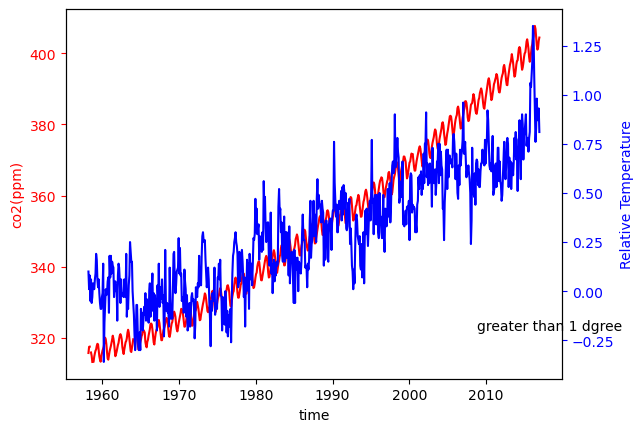

In [10]:
def plot_graph(axes,x,y,xlabel,ylabel,color):
    axes.plot(x,y,color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel,color = color)
    axes.tick_params('y',colors = color)

fig , ax = plt.subplots()
plot_graph(ax,climate_change.index,climate_change["co2"],"time","co2(ppm)","red")
ax2 = ax.twinx()
plot_graph(ax2,climate_change.index,climate_change["relative_temp"],"time","Relative Temperature","blue")
ax2.annotate("greater than 1 dgree" ,
             xy = (pd.Timestamp("2015-10-06"),1),
             xytext=(pd.Timestamp("2008-10-06"),-0.2))


5. Adding arrows to annotation

To connect between the annotation text and the annotated data, we can add an arrow. The key-word argument to do this is called arrowprops, which stands for arrow properties. This key-word argument takes as input a dictionary that defines the properties of the arrow that we would like to use. If we pass an empty dictionary into the key-word argument, the arrow will have the default properties, as shown here.

Text(2008-10-06 00:00:00, -0.2, 'greater than 1 dgree')

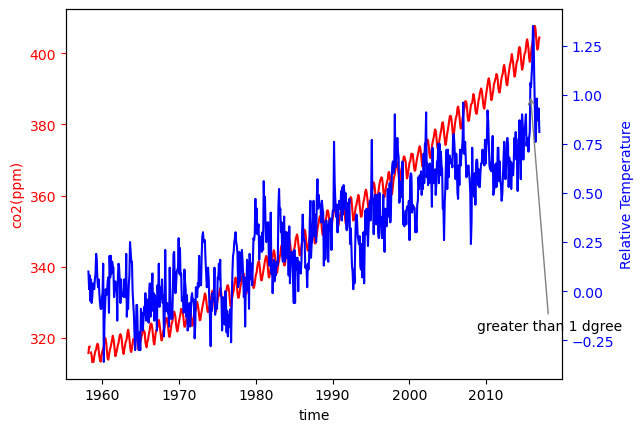

In [11]:
def plot_graph(axes,x,y,xlabel,ylabel,color):
    axes.plot(x,y,color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel,color = color)
    axes.tick_params('y',colors = color)

fig , ax = plt.subplots()
plot_graph(ax,climate_change.index,climate_change["co2"],"time","co2(ppm)","red")
ax2 = ax.twinx()
plot_graph(ax2,climate_change.index,climate_change["relative_temp"],"time","Relative Temperature","blue")
ax2.annotate("greater than 1 dgree" ,
             xy = (pd.Timestamp("2015-10-06"),1),
             xytext=(pd.Timestamp("2008-10-06"),-0.2),
#             arrowprops={}, # shows the default arrow
            #coustumizing arrow properties
            arrowprops ={"arrowstyle":"->","color": "grey"} )

## Quantitative comparisons and statistical visualizations

In [12]:
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0) # using the first column, which contains the country names, as the index for the DataFrame.
# country names doesn't have any column name so index_col = 0

In [13]:
medals


,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


 Next, we can visualize the data about gold medals. We create a Figure and an Axes object and call the Axes bar method to create a bar chart. This chart shows a bar for every row in the "Gold" column of the DataFrame, where the height of the bar represents the number in that row. The labels of the x-axis ticks correspond to the index of the DataFrame, which contains the names of the different countries in the data table

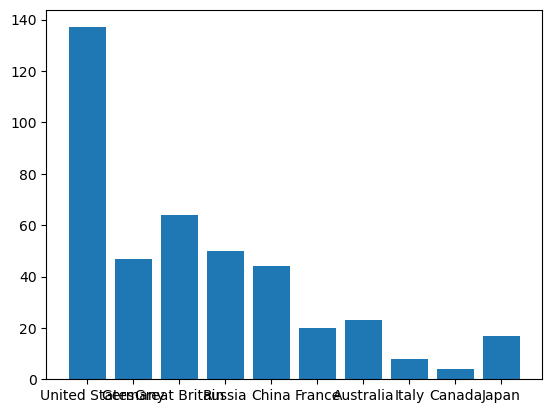

In [14]:
fig ,ax = plt.subplots()
ax.bar(medals.index,medals["Gold"])
plt.show()

Unfortunately, these names are rather long, so they overlap with each other. Let's fix that first.
To fix these labels, we can rotate them by 90 degrees. This is done by using the set-underscore-xticklabels method of the Axes. 


C:\Users\BOSS\AppData\Local\Temp\ipykernel_8660\1433871918.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index,rotation = 90)


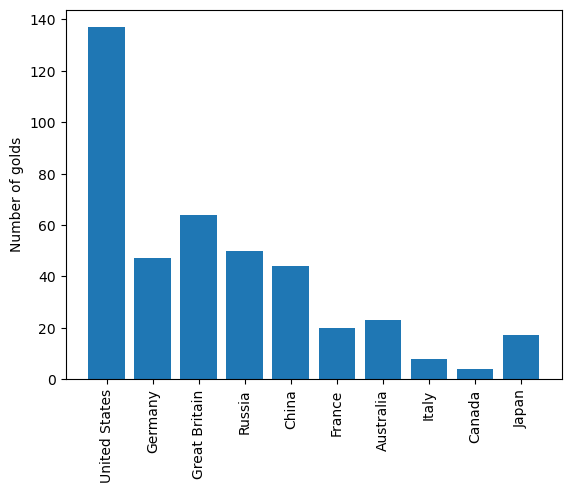

In [15]:
fig ,ax = plt.subplots()
ax.bar(medals.index,medals["Gold"])
ax.set_xticklabels(medals.index,rotation = 90)
ax.set_ylabel("Number of golds")
plt.show()

 visualizing the other medals

Next, we would like to add the data about the other medals: Silver and Bronze. To add this information into the same plot, we'll create a stacked bar chart. This means that each new data will be stacked on top of the previous data. It starts the same way as before. Next, we add another call to the bar method to add the data from the "Silver" column of the DataFrame. We add the bottom key-word argument to tell Matplotlib that the bottom of this column's data should be at the height of the previous column's data. We add the x-axis tick labels, rotating them by 90 degrees, set the y-axis labels, and call plt-dot-show.

C:\Users\BOSS\AppData\Local\Temp\ipykernel_8660\1996472916.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index,rotation = 90)


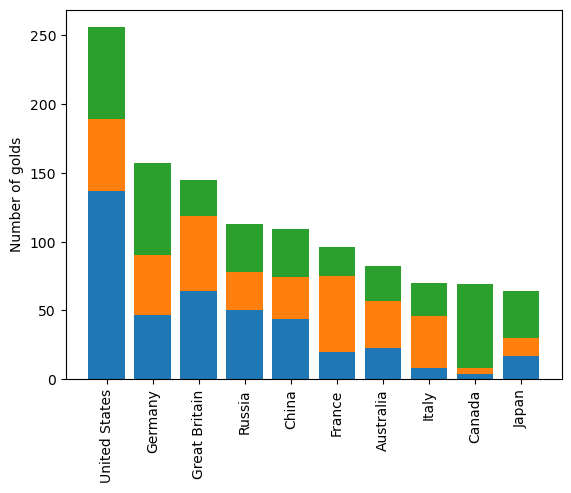

In [16]:
fig ,ax = plt.subplots()
ax.bar(medals.index,medals["Gold"])
ax.bar(medals.index,medals["Silver"],bottom = medals["Gold"])
ax.bar(medals.index,medals["Bronze"],bottom = medals["Silver"]+medals["Gold"])
ax.set_xticklabels(medals.index,rotation = 90)
ax.set_ylabel("Number of golds")
plt.show()

Adding a legend

The first is to add the label key-word argument to each call of the bar method with the label for the bars plotted in this call. The second is to add a call to the Axes legend method before calling show. This adds in a legend that tells us which color stands for which medal

C:\Users\BOSS\AppData\Local\Temp\ipykernel_8660\341877412.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index,rotation = 90)


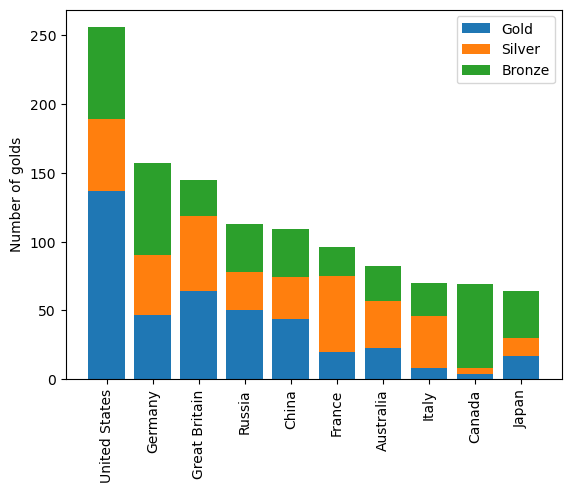

In [17]:
fig ,ax = plt.subplots()
ax.bar(medals.index,medals["Gold"],label = "Gold")
ax.bar(medals.index,medals["Silver"],bottom = medals["Gold"],label = "Silver")
ax.bar(medals.index,medals["Bronze"],bottom = medals["Silver"]+medals["Gold"],label = "Bronze")
ax.set_xticklabels(medals.index,rotation = 90)
ax.set_ylabel("Number of golds")
ax.legend()
plt.show()

### Quantitative comparisons: histograms

In [18]:
olympic_2016 = pd.read_csv('summer2016.csv')

In [19]:
olympic_2016.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team',
       'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [20]:
gymnastic = olympic_2016[(olympic_2016['Sport'] == 'Gymnastics') & (olympic_2016['Sex']=='M') ]
mens_gymnastic = gymnastic.head()
# extracting first five datas of men who won Gymnastics

In [21]:
mens_gymnastic

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
5,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
6,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
122,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
123,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze


In [22]:
rowing = olympic_2016[(olympic_2016['Sport'] =='Rowing') & (olympic_2016['Sex']=='M') ]
mens_rowing = rowing.head()
# extracting first five datas of men who won Rowing

In [23]:
mens_rowing

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
78,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
93,14871,8025,Thomas Gabriel Jrmie Baroukh,M,28.0,183.0,70.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Bronze
97,15215,8214,Jacob Jepsen Barse,M,27.0,188.0,73.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Coxless Fours,Silver
119,18441,9764,Alexander Belonogoff,M,26.0,187.0,90.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Quadruple Sculls,Silver


#### Introducing Histogram

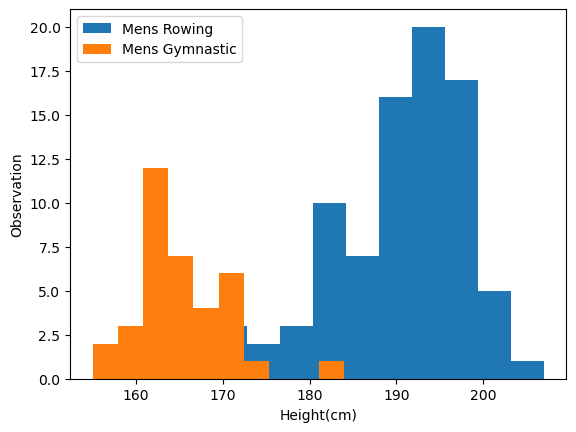

In [24]:
fig,ax = plt.subplots()
ax.hist(rowing["Height"] , label = "Mens Rowing")
ax.hist(gymnastic["Height"],label = "Mens Gymnastic") 
ax.set_xlabel("Height(cm)")
ax.set_ylabel("Observation")
ax.legend()
plt.show()

In the histogram shown, the x-axis is the values within the variable and the height of the bars represents the number of observations within a particular bin of values. For example, there are 12 gymnasts with heights between 164 and 167 centimeters, so the highest bar in the orange histogram is 12 units high. Similarly, there are 20 rowers with heights between 188 and 192 centimeters, and the highest bar in the blue histogram is 20 units high.

looking at this figure, you might wonder whether there are any rowing medalists with a height of less than 180 centimeters. This is hard to tell because the bars for the gymnastics histogram are occluding this information.

The occlusion can be eliminated by changing the type of histogram that is used. Instead of the "bar" type that is used per default, you can specify a histtype of "step", which displays the histogram as thin lines, instead of solid bars,

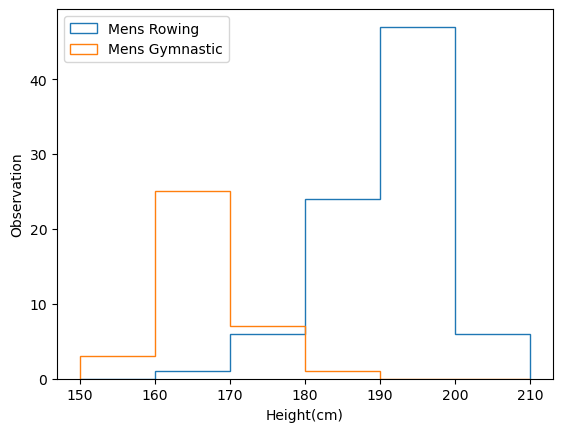

In [25]:
fig,ax = plt.subplots()
ax.hist(rowing["Height"] , 
        label = "Mens Rowing", 
        bins = [150,160,170,180,190,200,210],
       histtype='step') # we can also provide integer value to bins
ax.hist(gymnastic["Height"],
        label = "Mens Gymnastic", 
        bins = [150,160,170,180,190,200,210],
       histtype='step') # if not matplotlib automatically divides
ax.set_xlabel("Height(cm)")
ax.set_ylabel("Observation")
ax.legend()
plt.show()

exposing that yes: there are rowers with a height of less than 180 centimeters.

##### Adding error bars to bar charts

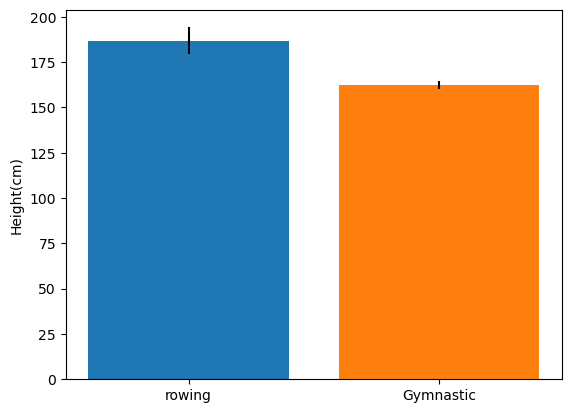

In [26]:
fig , ax = plt.subplots()
ax.bar("rowing",
        mens_rowing["Height"].mean(),
        yerr = mens_rowing["Height"].std())
ax.bar("Gymnastic",
        mens_gymnastic["Height"].mean(),
        yerr = mens_gymnastic["Height"].std())
ax.set_ylabel("Height(cm)")
plt.show()

4. Adding error bars to plots

We can also add error bars to a line plot. For example, let's look at the weather data . To plot this data with error bars, we will use the Axes errorbar method. Like the plot method, this method takes a sequence of x values, in this case, the "MONTH" column, and a sequence of y values, in this case, the column with the normal average monthly temperatures. In addition, a yerr key-word argument can take the column in the data that contains the standard deviations of the average monthly temperatures

In [27]:
seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')

In [28]:
# fig , ax = plt.subplots()
# ax.errorbar(seattle_weather["MONTH"],
#             seattle_weather["MLY-TAVG-NORMAL"],
#             yerr = seattle_weather["MLY-TAVG-STDDEV"])
# ax.errorbar(austin_weather["MONTH"],
#             austin_weather["MLY-TAVG-NORMAL"],
#             yerr = austin_weather["MLY-TAVG-STDDEV"])
# plt.show()

##### Adding Boxplot

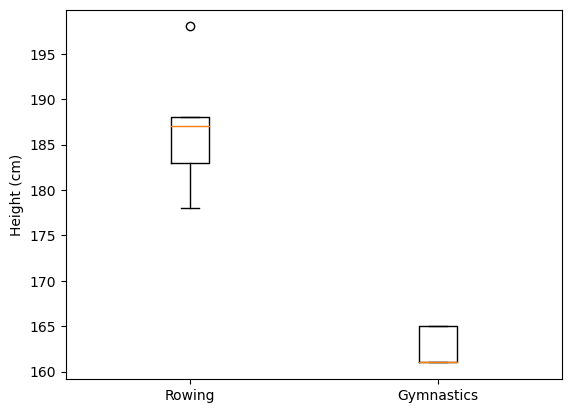

In [29]:
fig , ax = plt.subplots()
ax.boxplot([mens_rowing["Height"],
            mens_gymnastic["Height"]])
ax.set_xticklabels(["Rowing","Gymnastics"])
ax.set_ylabel("Height (cm)")
plt.show()

#### Scatter plots

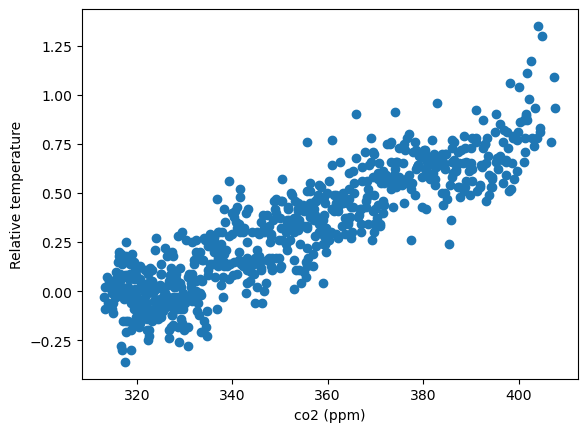

In [30]:
fig , ax = plt.subplots()
ax.scatter(climate_change["co2"],climate_change["relative_temp"])
ax.set_xlabel("co2 (ppm)")
ax.set_ylabel("Relative temperature")
plt.show()

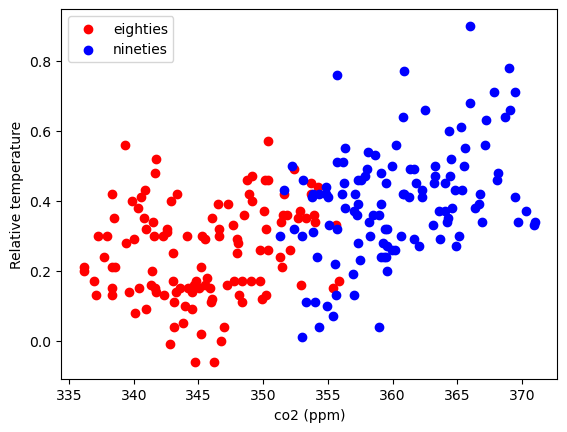

In [31]:
fig , ax = plt.subplots()
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

ax.scatter(eighties["co2"],eighties["relative_temp"],label = "eighties",color = "red")
ax.scatter(nineties["co2"],nineties["relative_temp"],label = "nineties",color = "blue")
ax.legend()
ax.set_xlabel("co2 (ppm)")
ax.set_ylabel("Relative temperature")
plt.show()

if we enter the index as input to the c key-word argument, this variable will get encoded as color. Note that this is not the color key-word argument that we used before, but is instead just the letter c. As before, we set the axis labels and call plt-dot-show.

 Encoding time in color

Now, time of the measurements is encoded in the brightness of the color applied to the points, with dark blue points early on and later points in bright yellow

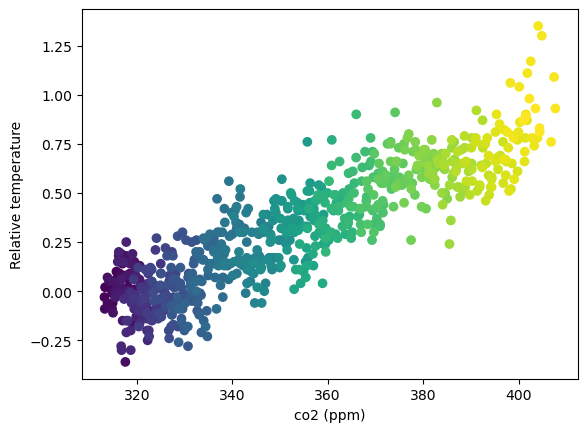

In [32]:
fig , ax = plt.subplots()
ax.scatter(climate_change["co2"],climate_change["relative_temp"],c=climate_change.index)
ax.set_xlabel("co2 (ppm)")
ax.set_ylabel("Relative temperature")
plt.show()

##### saving figure to a file

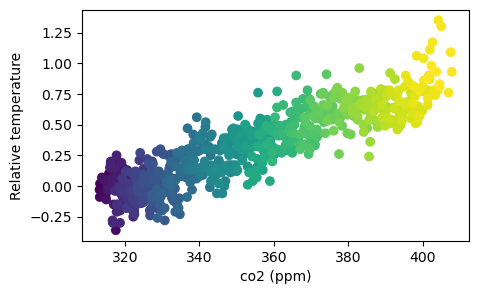

In [33]:
fig , ax = plt.subplots()
ax.scatter(climate_change["co2"],climate_change["relative_temp"],c=climate_change.index)
ax.set_xlabel("co2 (ppm)")
ax.set_ylabel("Relative temperature")
fig.set_size_inches([5,3]) # width and height
fig.savefig("climate_change0.jpg")
fig.savefig("climate_change1.png" , dpi = 300) # setting resolution


C:\Users\BOSS\AppData\Local\Temp\ipykernel_8660\3619356725.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Sports , rotation = 90)


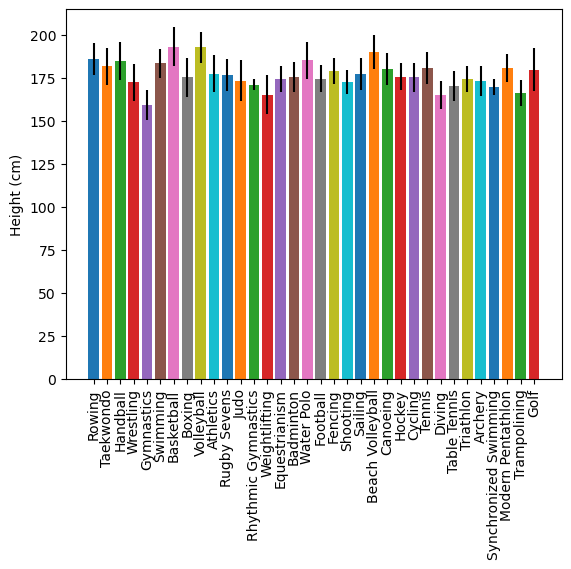

In [34]:
Sports = olympic_2016["Sport"].unique() # getting unique values from a column
# bar charts of height for all the sports
fig , ax = plt.subplots()
for sport in Sports:
    sport_df = olympic_2016[olympic_2016["Sport"] == sport ]
    ax.bar(sport,sport_df["Height"].mean(),
    yerr = sport_df["Height"].std())
ax.set_ylabel("Height (cm)")
ax.set_xticklabels(Sports , rotation = 90)
plt.show()